#**Assignment 4 - Clustering Techniques**



#**K-Means Clustering**

K-means is a centroid-based or partition-based clustering algorithm. This algorithm partitions all the points in the sample space into K groups of similarity. The similarity is usually measured using Euclidian Distance.

In [7]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

In [8]:
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/DataMining/Assignment3/housing_data.csv'
data = pd.read_csv(path)
data.head(5)

Mounted at /content/drive/


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
#Basic information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Data has 18 columns and 4600 rows of values. None of the rows have null values.

If any of the columns contain value of no significance in clustering the data, Eg: Serial number and Customer ID, it can be dropped. But in this dataset all column values are significant and hence all are required.

In [10]:
#Statistics of the data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [11]:
# creating a subset of the data using price, sqft_lot and yr_built
#data_subset = data.loc[:,['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above','yr_built']]
data_subset = data.loc[:,['price','sqft_above']]
data_subset.head(10)

,price,sqft_above
0,313000.0,1340
1,2384000.0,3370
2,342000.0,1930
3,420000.0,1000
4,550000.0,1140
5,490000.0,880
6,335000.0,1350
7,482000.0,2710
8,452500.0,1570
9,640000.0,1520


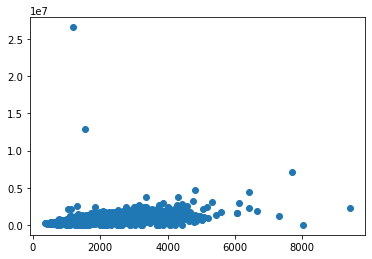

In [12]:
# plotting prices over the years
plt.scatter(data_subset['sqft_above'],data_subset['price'])

There is a variation in the magnitude of data. Variables like yr_built have low magnitude and price and sqft_lot have higher magnitude. 

Since K-means is a distance based algorithm, this difference in magnitude can create a problem. So let's bring all the variables to the same magnitude.

In [13]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Using sqft_above and price for easy visualization
data_scaled = scaler.fit_transform(data_subset)
print("Type of data scaled: {}".format(type(data_scaled)))

#Statistics of the scaled data
data_s = pd.DataFrame(data_scaled).describe()
data_s

Type of data scaled: <class 'numpy.ndarray'>


,0,1
count,4.600000e+03,4.600000e+03
mean,6.736158e-17,-7.018540e-17
std,1.000109e+00,1.000109e+00
min,-9.790511e-01,-1.690416e+00
25%,-4.063476e-01,-7.392225e-01
50%,-1.614470e-01,-2.752259e-01
75%,1.826966e-01,5.483681e-01
max,4.618529e+01,8.795908e+00


The magnitude of all values look same now.

In [14]:
#Changing the scaled data set type to panda dataframe
df_scaled = pd.DataFrame(data_scaled, columns= data_subset.columns[0:])
#View the first 5 rows after scaling
df_scaled.head()

,price,sqft_above
0,-0.423864,-0.565224
1,3.249598,1.789559
2,-0.372424,0.119171
3,-0.234071,-0.959621
4,-0.003482,-0.797222


In [15]:
#Defining the kmeans function with initializion as kmeans++
kmeans = KMeans(n_clusters=2, init='k-means++')

#Fitting the k-means algorithm on scaled data 
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

To calculate how well formed the k-means clusters are we calculate the intertia.

In [16]:
kmeans.inertia_

5629.503976656404

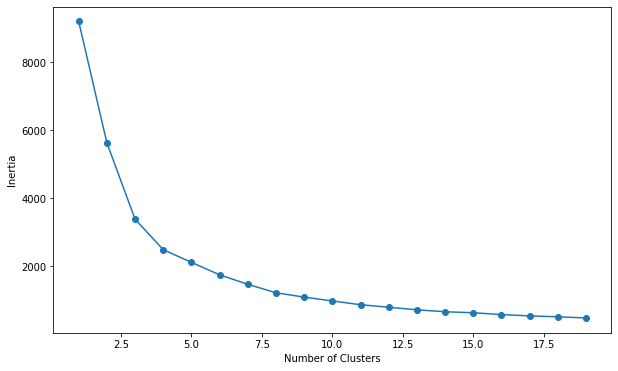

In [17]:
#Fiting multiple k-means algorithm and storing the values in a list
SSE = []
for cluster in range(1, 20):
  kmeans = KMeans(n_clusters = cluster, init = 'k-means++')
  kmeans.fit(df_scaled)
  SSE.append(kmeans.inertia_)

#Converting the results into dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [18]:
def kmeans_func(no_cluster, df):
  kmeans = KMeans(n_clusters = no_cluster, init = 'k-means++')
  kmeans.fit(df)
  pred = kmeans.predict(df)
  kmeans.cluster_centers_
  return (pred, kmeans.cluster_centers_)

Apply the above function to clusters 3 to 7

In [19]:
pred_3, centroid_3 = kmeans_func(3, df_scaled)
pred_4, centroid_4 = kmeans_func(4, df_scaled)
pred_5, centroid_5 = kmeans_func(5, df_scaled)
pred_6, centroid_6 = kmeans_func(6, df_scaled)
pred_7, centroid_7 = kmeans_func(7, df_scaled)

Lets look at the value counts

In [20]:
unique, counts = np.unique(pred_3, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3317]
 [   1 1281]
 [   2    2]]


Here we can plot for each cluster for better understanding.

In [21]:
df_scaled = np.array(df_scaled)

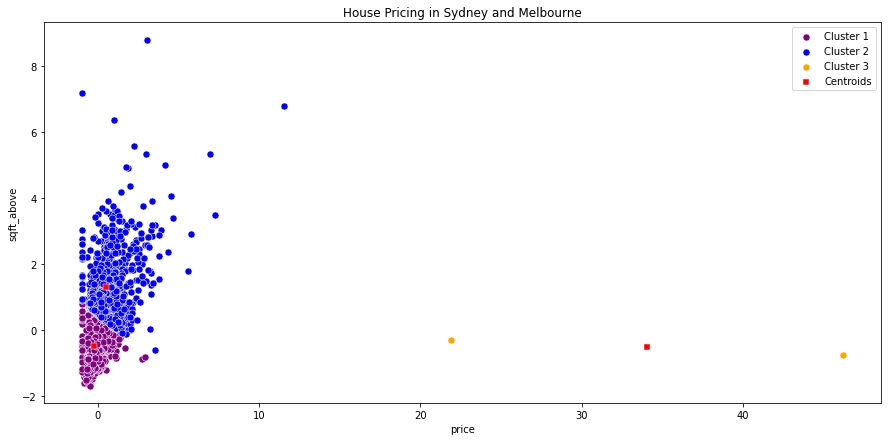

In [22]:
plt.figure(figsize = (15, 7))
sns.scatterplot(df_scaled[pred_3 == 0,0], df_scaled[pred_3 == 0,1], color = 'purple', label = 'Cluster 1', s = 50)
sns.scatterplot(df_scaled[pred_3 == 1,0], df_scaled[pred_3 == 1,1], color = 'blue', label = 'Cluster 2', s = 50)
sns.scatterplot(df_scaled[pred_3 == 2,0], df_scaled[pred_3 == 2,1], color = 'orange', label = 'Cluster 3', s = 50)
sns.scatterplot(centroid_3[:,0], centroid_3[:,1], color = 'red', label = 'Centroids', marker=',')
plt.grid(False)
plt.title('House Pricing in Sydney and Melbourne')
plt.xlabel('price')
plt.ylabel('sqft_above')
plt.legend()
plt.show()

#Findings

* The purple and the blue clusters lay in the lower end of pricing levels
* As the square footage gradually increases so does the price of the house but still stays in the lower end of pricing. 
* Most houses have a price range that is under 20M, which is represented by the purple and blue clusters.
* The outliers represented by yellow as seen are very few and are in the price range of 20M to 40M.
* A centroid lies at the 1:1 point on the graph of the blue cluster which means, in this cluster the pricing of the house steadily increases with the square footage of the house.
* A centroid in the purple cluster is at a 1:2 point in the graph indicating for a lower price a higher square footage is got. This could be due to the change in the region to an area that has houses with lower prices.
* The outliers are providing lower square footage at a higher price, this could be due to the change in region where that area has a higher real estate value.


# 2. TENSOR FLOW APPROACH

In [23]:
#Import tensorflow libraries
%tensorflow_version 2.x 
import tensorflow as tf
tf.keras.backend.clear_session()
print(tf.__version__)

2.7.0


In [24]:
df = data
print(df)

                     date         price  bedrooms  ...       city  statezip  country
0     2014-05-02 00:00:00  3.130000e+05       3.0  ...  Shoreline  WA 98133      USA
1     2014-05-02 00:00:00  2.384000e+06       5.0  ...    Seattle  WA 98119      USA
2     2014-05-02 00:00:00  3.420000e+05       3.0  ...       Kent  WA 98042      USA
3     2014-05-02 00:00:00  4.200000e+05       3.0  ...   Bellevue  WA 98008      USA
4     2014-05-02 00:00:00  5.500000e+05       4.0  ...    Redmond  WA 98052      USA
...                   ...           ...       ...  ...        ...       ...      ...
4595  2014-07-09 00:00:00  3.081667e+05       3.0  ...    Seattle  WA 98133      USA
4596  2014-07-09 00:00:00  5.343333e+05       3.0  ...   Bellevue  WA 98007      USA
4597  2014-07-09 00:00:00  4.169042e+05       3.0  ...     Renton  WA 98059      USA
4598  2014-07-10 00:00:00  2.034000e+05       4.0  ...    Seattle  WA 98178      USA
4599  2014-07-10 00:00:00  2.206000e+05       3.0  ...  Covington

In [25]:
#Considering only price and sqft_above values
data_sub = df.loc[:,['price', 'sqft_above']]
data_sub.head(10)

,price,sqft_above
0,313000.0,1340
1,2384000.0,3370
2,342000.0,1930
3,420000.0,1000
4,550000.0,1140
5,490000.0,880
6,335000.0,1350
7,482000.0,2710
8,452500.0,1570
9,640000.0,1520


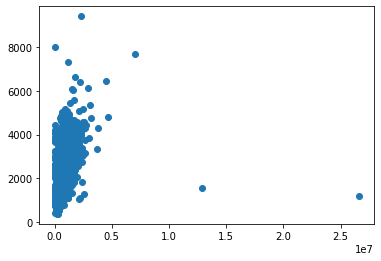

In [26]:
#Plot the points using the values in cloumns price and sqft_above
plt.scatter(data_sub['price'],data_sub['sqft_above'])

In [27]:
#Standardising the data
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(data_sub[['price']])
data_sub['price'] = scaler2.transform(data_sub[['price']])

scaler2.fit(data_sub[['sqft_above']])
data_sub['sqft_above'] = scaler2.transform(data_sub[['sqft_above']])

data_sub.head()

,price,sqft_above
0,0.011771,0.107301
1,0.089658,0.331858
2,0.012862,0.172566
3,0.015795,0.069690
4,0.020684,0.085177


In [28]:
# using tensorflow estimator KMeans method

num_points = 200

def cluster_func():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(data_sub.to_numpy(), dtype=tf.float32), num_epochs=1)
  
num_clusters = 4
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters = num_clusters, use_mini_batch=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpn8wpgue2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
# Train the algorithm
num_iterations = 15
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(cluster_func)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print ('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print ('score:', kmeans.score(cluster_func))
print ('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(cluster_func))
for i, point in enumerate(data_sub):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
Prefer Dataset.range instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpn8wpgue2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpn8wpgue2/model.ckpt.
INFO:tensorflow:Calling checkp

In [30]:
centeroids = kmeans.cluster_centers()
centeroids

array([[0.04329708, 0.39517155],
       [0.02040887, 0.14957702],
       [0.02566785, 0.24814948],
       [0.01432225, 0.0805077 ]], dtype=float32)

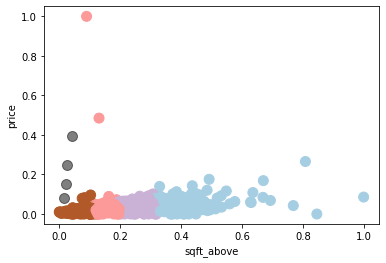

In [31]:
data_sub.plot.scatter(x= 'sqft_above', y = 'price', c=cluster_indices, s=100, cmap='Paired')
plt.scatter(centeroids[:, 0], centeroids[:, 1], c='black', s=100, alpha=0.5);

#**Hierarchical Clustering**

Hierarchical clustering also known as hierarchical cluster analysis (HCA) is also a method of cluster analysis which seeks to build a hierarchy of clusters without having fixed number of cluster.

Implemented Agglomerative hierarchical clustering using scikit library to find clusters and interpret them on Housing price prediction dataset.

###**Perform preprocessing on dataset**

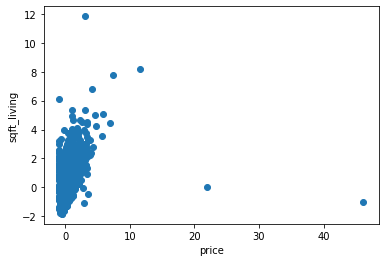

In [33]:
from sklearn.preprocessing import StandardScaler

data_df = data.loc[data['price'] > 0]
data_selected = data[['price', 'sqft_living']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

plt.scatter(data_scaled[:,0],data_scaled[:,1])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()


###**Draw dendogram to decide the number of clusters required for the house rent prediction.**

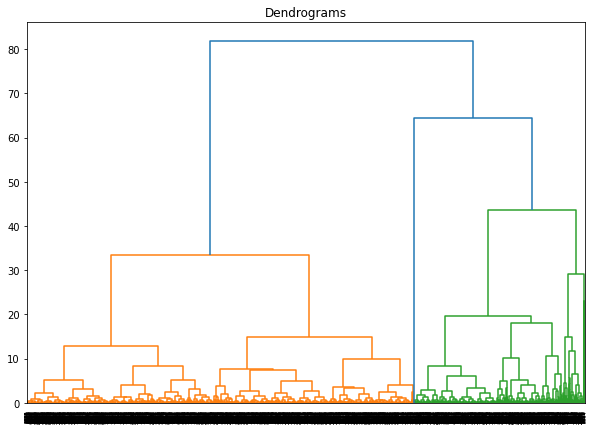

In [34]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

##**The vertical line with maximum distance is the blue line, therefore we decide to cut the dendogram at that point**

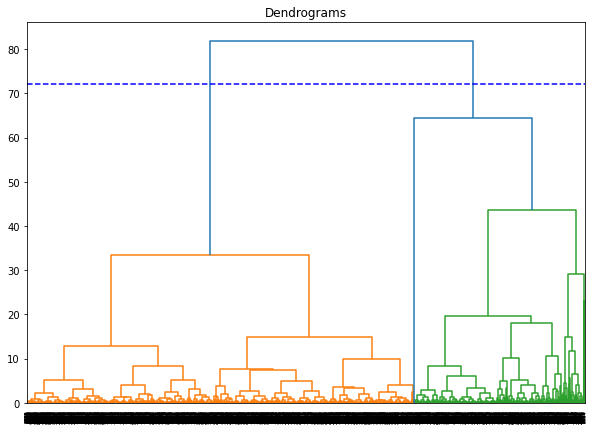

In [35]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=72, color='b', linestyle='--')

###**Got two vertical points that cut the blue line, so apply hierarchical clustering on two clusters**

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 0, 1, ..., 0, 1, 1])

###**Visualizing the two clusters**

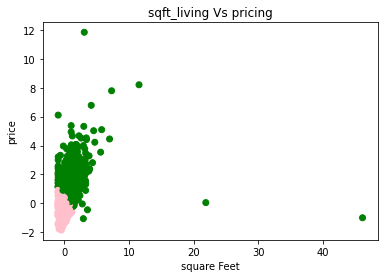

In [37]:
cmap = ListedColormap(['green', 'pink']) 
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=cluster.labels_, cmap =cmap) 

plt.title('sqft_living Vs pricing')
plt.xlabel('square Feet')
plt.ylabel('price')
plt.show() 

#**GMM Clustering**

As its name implies, each cluster is modelled according to a different Gaussian distribution.

####**Creating a subset of the data using price, sqft_living**

In [38]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline
from matplotlib.colors import ListedColormap

In [39]:
gmm_data=data
gmm_data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [40]:
gmm_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [41]:

data_subset = gmm_data.loc[:,['price','sqft_living']]
data_subset.head(10)

,price,sqft_living
0,313000.0,1340
1,2384000.0,3650
2,342000.0,1930
3,420000.0,2000
4,550000.0,1940
5,490000.0,880
6,335000.0,1350
7,482000.0,2710
8,452500.0,2430
9,640000.0,1520


###**Perform preprocessing on dataset**

Removing the features having value 0

Removing the outliers from the dataset for the selected features

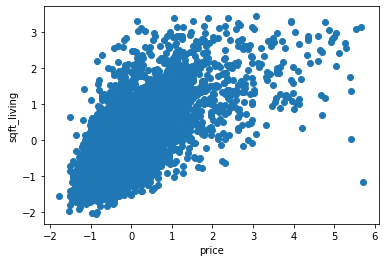

In [42]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
data_gmm = gmm_data.loc[data['price'] > 0]
data_selected = data_gmm[['price', 'sqft_living']]
outlier_free_data = data_selected[(np.abs(stats.zscore(data_selected)) < 3).all(axis=1)]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(outlier_free_data)

plt.scatter(data_scaled[:,0],data_scaled[:,1])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

###**Calculating the Silhoutte score to find the number of clusters using Scikit learn**

In [43]:
# training gaussian mixture model
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
def find_best_n_clusters(data, clusterer, max_n_clusters, random_state, **kwargs):
    
    args = {i: j for i, j in kwargs.items() if i in clusterer.get_params(clusterer)}
    if 'n_clusters' in clusterer.get_params(clusterer):
        kms = True
    else:
        kms = False
    args.pop('n_clusters' if kms else 'n_components', None)
    args.update({'random_state': random_state})
    score = {}
    for i in range(2, max_n_clusters + 1):
        args.update({'n_clusters' if kms else 'n_components': i})
        km = clusterer(**args)
        score[i] = silhouette_score(data, km.fit_predict(data), metric='cosine')
    best = pd.Series(score).idxmax()
    args.update({'n_clusters' if kms else 'n_components': best})
    print(f'Best number of clusters is {best}')
    return args 
find_best_n_clusters(data_scaled,GaussianMixture,30,None)

Best number of clusters is 2


{'n_components': 2, 'random_state': None}

*As per the silhoutte score, we got 2 as the best number of clusters for the dataset.*

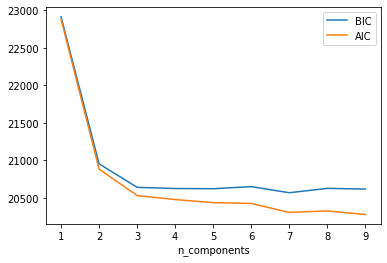

In [44]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

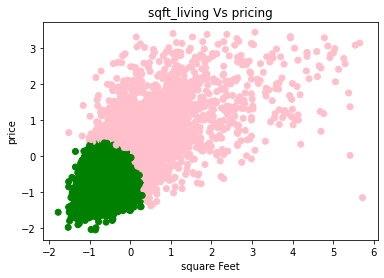

In [45]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(data_scaled)

#predictions from gmm
labels = gmm.predict(data_scaled)
# frame = pd.DataFrame(data)
# frame['cluster'] = labels
# frame.columns = ['Weight', 'Height', 'cluster']

# color=['blue','green','cyan', 'black']
# for k in range(0,4):
#     data = frame[frame["cluster"]==k]
#     plt.scatter(data["Weight"],data["Height"],c=color[k])
# plt.show()

cmap = ListedColormap(['green', 'pink']) 
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=labels, cmap =cmap) 

plt.title('sqft_living Vs pricing')
plt.xlabel('square Feet')
plt.ylabel('price')
plt.show()

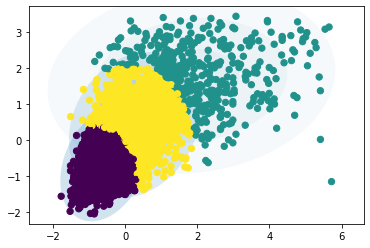

In [46]:
# plotting gaussian
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
plot_gmm(gmm, data_scaled)     

*Draw the ellipses with given positions and covariance. We see that the housing data is distributed among three Gaussian Distributions.*

#**DB Scan Clustering using pycaret library**

DBScan is a density-based clustering algorithm. The key fact of this algorithm is that the neighbourhood of each point in a cluster which is within a given radius (R) must have a minimum number of points (M).

In [47]:
!pip install mglearn
!pip install sklearn
!pip install -U scikit-learn
!pip install pycaret

import mglearn
import sklearn

     |████████████████████████████████| 23.2 MB 2.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.5 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.


  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [48]:
import mglearn
import sklearn

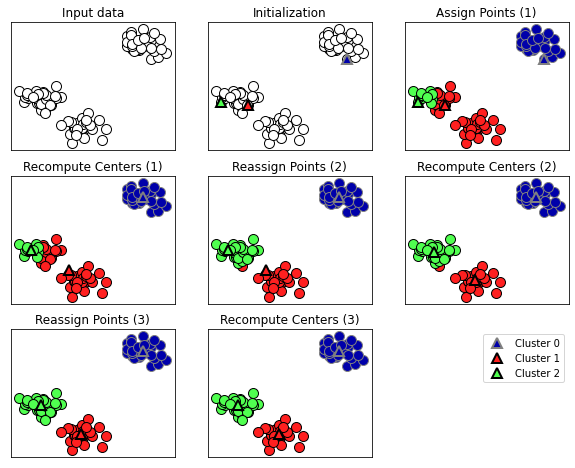

In [49]:
mglearn.plots.plot_kmeans_algorithm()

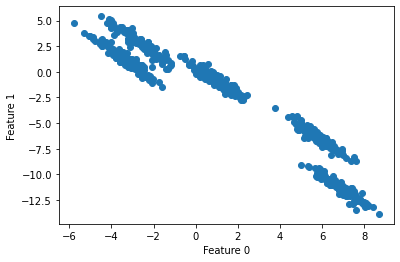

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

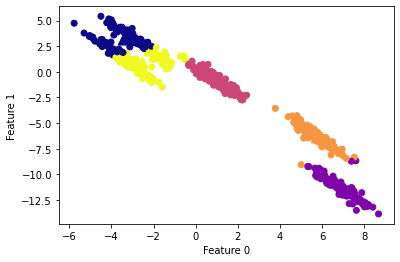

In [51]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [52]:
cols = ['column1', 'column2', 'column3',
        'column4', 'column5']
arr = make_blobs(n_samples = 1000, n_features = 5, random_state =20,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


**Initializing the PyCaret Environment**

In [63]:
from pycaret import clustering

In [66]:
cluster = clustering.setup(data, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(1000, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 5)"
9,CPU Jobs,-1


After completing the Exploratory Data Analysis (EDA), we are now going to use the setup() function to initialize the PyCaret environment. By doing this, a pipeline that prepares the data for model training and deployment will be created

In [67]:
model = clustering.create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5114,0.2904,0,0,0


In [69]:
model = clustering.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5822,6041.4265,1.2247,0,0,0


In [71]:
clustering.plot_model(model, 'cluster')

**DBSCAN**

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


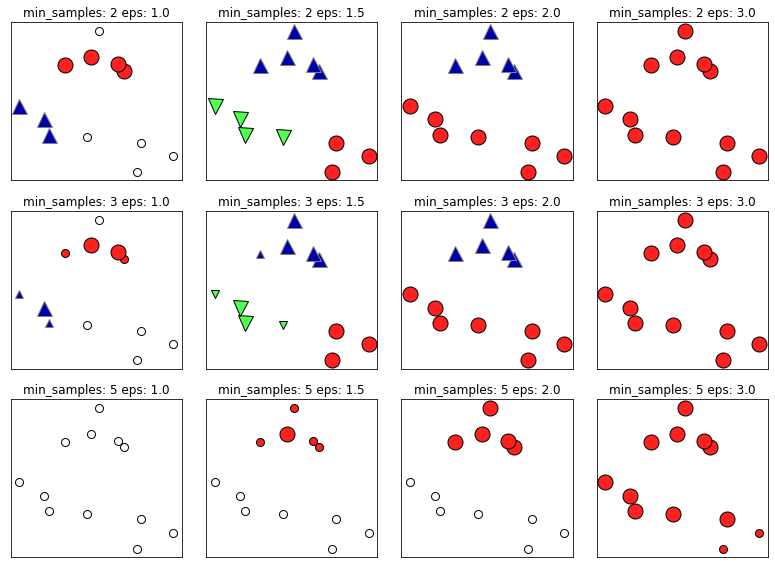

In [57]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

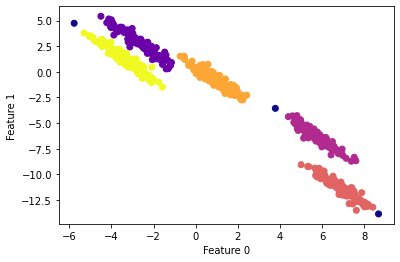

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Fairly consistent clusters have been found after twisting eps and min_samples still including some noise points. While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps implicitly controls how many clusters will be found.

In DBScan we can see how clear the graph is compared to k-means.

#**Conclusion**

### Advantages of K-Means

- Easy to understand and implement.

- Can handle large datasets well.

### Disadvantages of K-Means
- Sensitive to number of clusters/centroids chosen. Even after using techniques like Elbow method, it is sometimes hard to generate good clusters.

- Does not work well with outliers. Centroids can get dragged by the outliers resulting in skewed clusters.

- Gets difficult in high dimensional spaces as the distance between the points increases and Euclidean distance diverges.

- Gets slow as the number of dimensions increases.

---

### Advantages of DBSCAN
- Works well for noisy datasets.

- Can identity Outliers easily.

- Clusters can take any irregular shape unlike K-Means where clusters are more or less spherical.

### Disadvantages of DBSCAN
- Does not work very well for sparse datasets or datasets with varying density.

- Sensitive to eps and minPts parameters.

- Not partitionable for multiprocessor systems.

---
### Advantages	of Hierarchical	clustering
- Hierarchical	clustering	outputs	a	hierarchy. Therefore,	it	is	easier	to	decideon	the	number	of	clusters	by	looking	at	the	dendrogram.

- Easy	to	implement	

### Disadvantages	of Hierarchical	clustering
- It	is	not	possible	to	undo	the	previous	step:	once	the	instances	have	been	assigned	to	a	cluster,	they	can	no	longer	be	moved	around.	

- Time	complexity:	not	suitable	for	large	datasets

- The	order	of	the	data	has	an	impact	on	the	final	results	

- Very	sensitive	to	outliers